In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

df = load_iris()

In [3]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df.data[0] # features

array([5.1, 3.5, 1.4, 0.2])

In [5]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Data Preprocessing

In [6]:
data = pd.DataFrame(df.data, columns=df.feature_names) # combining both of em

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# df.target[df.target==0]
# df.target[df.target==1]
df.target[df.target==2]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [8]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
data['target'] = df.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data['flower_name'] = data.target.apply(lambda x: df.target_names[x])

data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
37,4.9,3.6,1.4,0.1,0,setosa
69,5.6,2.5,3.9,1.1,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
87,6.3,2.3,4.4,1.3,1,versicolor


### Exploratory Data Analysis (EDA)

In [11]:
df0 = data[data.target==0]
df1 = data[data.target==1]
df2 = data[data.target==2]

In [12]:
# df0.head()
# df1.head()
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


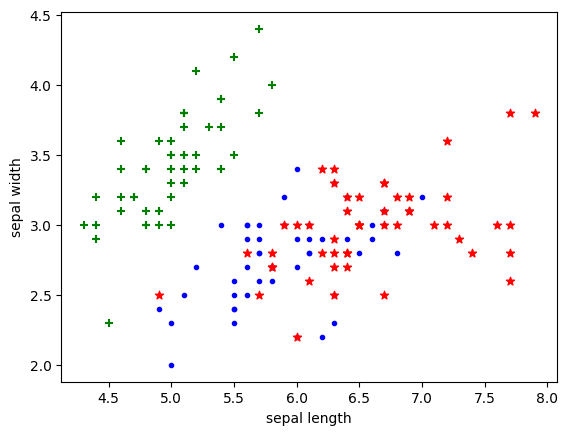

In [13]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')

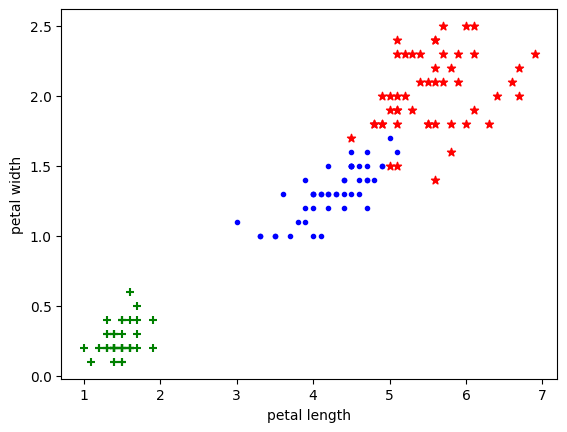

In [14]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='*')

### Training

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
X = data.drop(['target','flower_name'], axis='columns')
y = data.target

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### KNN algorithm

In [70]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=15)

In [71]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [72]:
model.score(X_test, y_test)

0.9666666666666667

### Confusion Matrix
It is used to see where our model predicted wrong

In [73]:
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [75]:
cm

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

### Heatmap of confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

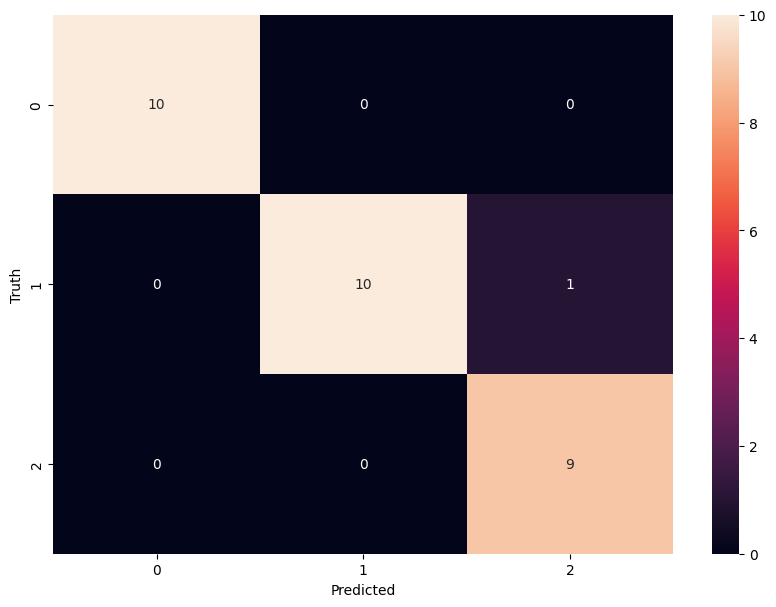

In [76]:
# lets use seaborn to visualize it more clearly
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Print classification report for precesion, recall and f1-score for each classes


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

